In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/users/rjmay/code/research_ms/normal_plots
Updated Directory: /mnt/c/users/rjmay/code/research_ms


In [2]:
! source ../venv/bin/activate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



### Load the data

In [4]:
# from modules.multi_bounds_v3 import bounds_class
# from modules.Bhatt_knn_func import knn_num_calc
# from modules.data_gen import data_gen

In [44]:
### 3 8 or 15
d = 15


dim_str = str(d) # TODO change me 


In [45]:
file_path = 'sim_data/mean_sep' + dim_str +'.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE
    

    
# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Use pickle.load to deserialize and load the list of objects from the file
    loaded_objects = pickle.load(file)

print('Loaded object successfully')
    
bound_obj_lst, mean_list, exact_BER= loaded_objects

Loaded object successfully


### Using the data



In [46]:
dpi = 250
fs = 17

In [47]:
# lst = [obj() for obj in bound_obj_lst ]

df = pd.DataFrame([obj() for obj in bound_obj_lst], index = mean_list)

df.head()


/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
0.125,0.467024,0.495138,0.500000,0.500000,0.144574,0.349945,0.202567,0.209874,NaN,0.000003,0.000291,0.234076,0.249473
0.250,0.455959,0.493203,0.499475,0.499976,0.142893,0.348194,0.200759,0.208009,NaN,0.000004,0.000338,0.224847,0.240594
0.375,0.432898,0.488080,0.481638,0.499058,0.140696,0.346055,0.198484,0.205657,NaN,0.000002,0.000179,0.239573,0.254546
0.500,0.409000,0.481060,0.424210,0.493590,0.137073,0.342400,0.194495,0.201539,NaN,0.000004,0.000391,0.244853,0.261351
0.625,0.384350,0.471733,0.379123,0.484886,0.135344,0.340114,0.192241,0.199210,NaN,0.000003,0.000267,0.251318,0.265105


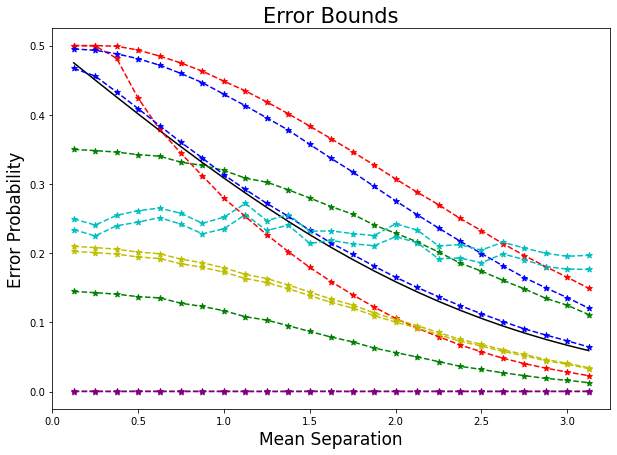

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot Bayes Error
ax.plot(mean_list,  exact_BER, 'k', label='Bayes Error')

# Plot Bha
ax.plot(df["Bha_lower"], 'r--', label='Bha')
ax.plot(df["Bha_upper"], 'r--')
ax.scatter(df.index, df["Bha_upper"], color='r', marker='*')
ax.scatter(df.index, df["Bha_lower"], color='r', marker='*')

# Plot Bha K-NN
ax.plot(df["Bha_knn_lower"], 'g--')
ax.plot(df["Bha_knn_upper"], 'g--', label='Bha K-NN')
ax.scatter(df.index, df["Bha_knn_upper"], color='g', marker='*')
ax.scatter(df.index, df["Bha_knn_lower"], color='g', marker='*')


ax.plot(df["inf_lower"], 'purple', linestyle = '--', label="Influence")
ax.plot(df["inf_upper"], 'purple', linestyle = '--')
ax.scatter(df.index, df["inf_lower"], color='purple', marker='*')
ax.scatter(df.index, df["inf_upper"], color='purple', marker='*')



# Plot Lower and Upper G_a
ax.plot(df["tight_lower"], 'y--', label="Arb Tight")
ax.plot(df["tight_upper"], 'y--')
ax.scatter(df.index, df["tight_lower"], color='y', marker='*')
ax.scatter(df.index, df["tight_upper"], color='y', marker='*')


# Plot Maha
# ax.plot( df["Maha_upper"], 'y--', label='Maha')
# ax.scatter(df.index, df["Maha_upper"], color='y', marker='*')


# Plot Dp
ax.plot(df["Dp_lower"], 'b--', label='Dp')
ax.plot(df["Dp_upper"], 'b--')
ax.scatter(df.index, df["Dp_lower"], color='b', marker='*')
ax.scatter(df.index, df["Dp_upper"], color='b', marker='*')


# Plot Lower and Upper enDive
ax.plot(df["enDive_lower"], 'c', ls = '--', label="enDive")
ax.plot(df["enDive_upper"], 'c', ls = '--',)
ax.scatter(df.index, df["enDive_lower"], color='c', marker='*')
ax.scatter(df.index, df["enDive_upper"], color='c', marker='*')


ax.set_xlabel("Mean Separation", fontsize=fs)
ax.set_ylabel("Error Probability", fontsize=fs)
ax.set_title("Error Bounds", fontsize=fs + 4)
# ax.legend( prop={'size': 15})

ax.set_xlim([0, 3.25])

file_name = r"normal_plots/images/mean_sep" + dim_str + ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= 300)

file_name = r"normal_plots/images/dpi/mean_sep" + dim_str + ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= 600)
plt.show()

Calculate true values

In [49]:
from scipy.stats import norm

dp_lst = []
bha_lst = []

#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

for i in mean_list:
    # Define the normal distributions
    f0 = norm.pdf(x, loc=i, scale =1)
    f1 = norm.pdf(x, loc=0, scale =1)

    # Calculate the minimum of f0 and f1
    min_f0_f1 = np.minimum(f0, f1)
    # Calculate BER as 0.5 * sum(min(f0, f1) * dx)
    BER = 0.5 * np.nansum(min_f0_f1 * dx)
    # print(BER)
    p = 0.5
    q = 0.5
    pf0 = p * f0
    qf1 = q * f1

    # Calculate the function
    func = (pf0 - qf1)**2 / (pf0 + qf1)

    # Calculate dp using numerical integration (sum and dx)
    dp = np.nansum(func) * dx

    # Calculate upper and lower bounds
    upper = 0.5 - 0.5 * dp
    lower = 0.5 - 0.5 * np.sqrt(dp)

    theory_Dp = [lower, upper]
    dp_lst.append(theory_Dp)

    func2 = np.sqrt(f0 * f1)
    # Calculate BC using numerical integration (sum and dx)
    BC = np.nansum(func2) * dx

    lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
    upper = 0.5 * BC
    
    theory_bha = [lower, upper] 
    bha_lst.append(theory_bha)





In [50]:
def add_noise_to_df(df, noise_level=0.01):
    """
    Add random noise to each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data to which noise will be added.
    
    Returns:
    - pandas DataFrame with noise added to each column.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_noisy = df.copy()
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Calculate the range of the data in the column
#         data_range = df[col].max() - df[col].min()
        
        # Generate random noise from a normal distribution
#         noise = np.random.normal(0, noise_level * data_range, len(df[col]))
        noise = np.random.normal(0, noise_level )
#         noise = np.random.uniform(-1 * noise_level, noise_level)
        # Add the noise to the data in the column
        df_noisy[col] = df[col] + noise
    
    return df_noisy


In [51]:
lst = []

for i in range(len(exact_BER)):
    b = exact_BER[i]
    obj = bound_obj_lst[i]
    lst.append(obj.validity(b) )



df_valid_all = pd.DataFrame(lst, index = mean_list)


In [52]:
df_noise = add_noise_to_df(df_valid_all, .008)


df_valid = df_noise[[ 'Dp', 'Bha',
       'Bha_knn', 'tight', 'inf', 'enDive']]

# df_valid.head()

In [53]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = mean_list)

# bound_width_df.head()

### Plotting

Bhattacharyya, Bha Knn, influence same theoretically

Dp, enDive

In [54]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = mean_list)

bound_width_df.head()

,Dp,Bha,Bha_knn,tight,inf,enDive
0.125,0.028114,0.000000,0.205371,0.007307,0.000288,0.015397
0.250,0.037244,0.000501,0.205301,0.007250,0.000334,0.015747
0.375,0.055182,0.017420,0.205359,0.007174,0.000177,0.014973
0.500,0.072060,0.069380,0.205327,0.007044,0.000387,0.016498
0.625,0.087383,0.105762,0.204769,0.006969,0.000264,0.013786


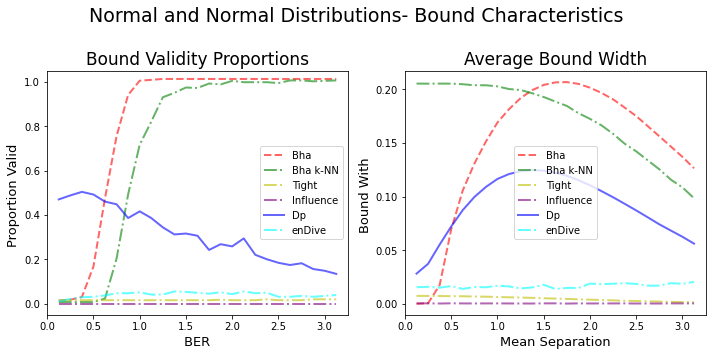

In [55]:
fs =13
overlapping = 0.6
lw = 2


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
st = fig.suptitle("Normal and Normal Distributions- Bound Characteristics", fontsize=fs+6)

ax = axes[0]
ax1 = ax




ax.plot(df_valid["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["tight"],'y',ls = "-.", label='Tight', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel(" BER ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.set_xlim(0, 3.25)
ax.legend()



ax = axes[1]

# ax.set_yscale('log', base=10)


ax.plot(bound_width_df["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(bound_width_df["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["tight"],'y',ls = "-.", label='Tight', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

ax.set_xlim(0, 3.25)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Mean Separation", fontsize = fs)
ax.set_ylabel("Bound With ", fontsize=fs)
# ax.set_ylim(0.0, 0.3)
ax.set_title("Average Bound Width" , fontsize = fs +4)
ax.legend()


fig.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the common title



file_name = r"normal_plots/images/mean_sep_bound" + dim_str +  ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()